In [22]:
# Install dependencies on colab
!pip install -Uqq fastbook

In [23]:
# Connect to google drive to load images and save model
import fastbook
fastbook.setup_book()

In [42]:
ls /content/gdrive/MyDrive/Colab\ Notebooks/finger_digits/train/

five/  four/  one/  three/  two/


In [24]:
from fastai.vision.all import *
from fastai.data.all import *

# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in a2
- Use `set_seed()` to obtain reproducible results.
- Use `item_tfms` and/or `batch_tfms`. Set `min_scale` so that digits are still visible
- Use a batch size of 32

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

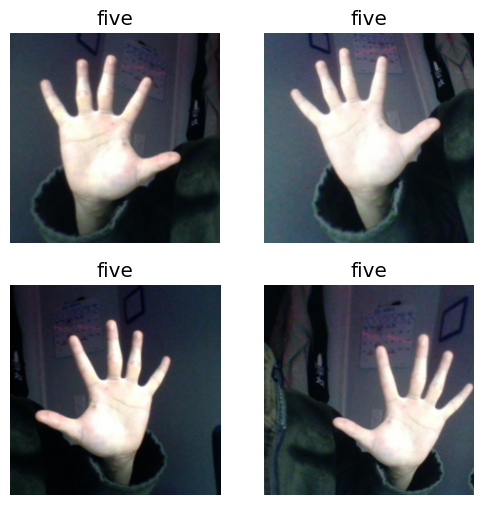

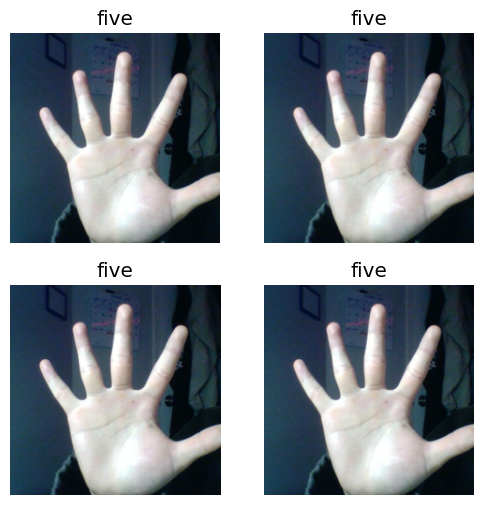

In [46]:
# Ensure reproducibility
set_seed(42, reproducible=True)

# Define path to your image data
path = Path('/content/gdrive/MyDrive/Colab Notebooks/finger_digits')

# Create a DataBlock
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Explicitly use your train and valid folders
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(min_scale=0.75)  # Apply min_scale correctly within batch_tfms
)

# Create DataLoaders
dls = data_block.dataloaders(path, batch_size=32)

# Show a training batch with augmentations
dls.train.show_batch(max_n=4, unique=True)

# Show a validation batch
dls.valid.show_batch(max_n=4, unique=True)

### Question 1: What type of item and batch transforms did you use? Can you spot any problems in the training set augmentations, e.g. finger digits missing?
*YOUR ANSWER HERE*


# 2. Train the classifier

## 2.1 Impact of learning rate
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- error rate as metric.

Use three learning rates:
- small: 3e-5
- medium: 3e-3
- large: 1e-1

Train the model with each learning rate using `fine_tune` with 10-15 epochs


### Question 2: Which training run resulted in the best model? State number of epochs and final error rate values for all learning rates and identify the best model.
*YOUR ANSWER HERE*


### Question 3: Did any models overfit? Include your reasoning.
*YOUR ANSWER HERE*


# 3. Analyze model performance
- Retrain the best model from above.
- Plot the confusion matrix.
- Plot 10 top losses

### Question 4: With which finger digits does your model have the most problems with?
*YOUR ANSWER HERE*


# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

# 5. Summary and Conclusion

Summarize the best model:
- Training strategy: learning rate and epochs used.
- Error rate achieved, summary of confusion matrix, i.e. what kind of errors does the model make.

*YOUR ANSWER HERE*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*
